In [1]:
import numpy as np
import pandas as pd
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv('andmed/train.csv') # Data is provided at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
test = pd.read_csv('andmed/test.csv')   # `kaggle competitions download -c house-prices-advanced-regression-techniques` also works
train.shape, test.shape

((1460, 81), (1459, 80))

In [3]:
data = pd.concat([train,test])

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#data.drop(["Id"], axis=1, inplace=True)
# remove features useless for regressions models
regression_data = pd.concat([train,test])
useless_features = [ "MiscFeature", "MiscFeature", "MoSold", "YrSold", "SaleType", "SaleCondition" ]
regression_data.drop(useless_features, axis=1, inplace=True)

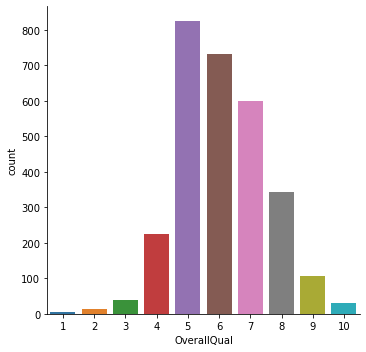

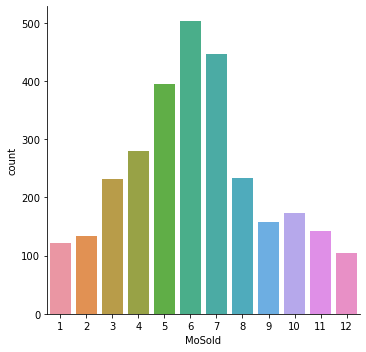

In [6]:
features = ["OverallQual", "MoSold"]

for feature in features:    
    sns.catplot(x=str(feature), kind="count", data=data)

In [7]:
regression_data.fillna(train.mean())
regression_data.fillna("None")
"" # Rules state that data must not be uploaded to repos, and should not be obtainable from anywhere besides Kaggle.

''

In [8]:
data_dum = pd.get_dummies(regression_data, regression_data.select_dtypes(include="object").columns)
train_dum = data_dum.loc[data_dum.SalePrice.notna()].drop("Id", axis=1)
test_dum = data_dum.loc[data_dum.SalePrice.isna()]
test_dum = test_dum.drop(columns="SalePrice")

In [9]:
train_dum = train_dum.fillna(train_dum.mean())
test_dum = test_dum.fillna(test_dum.mean())

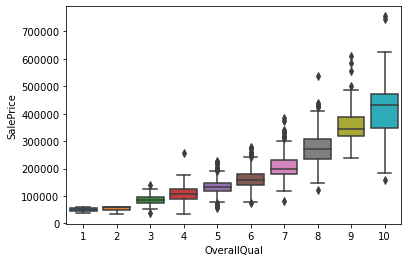

In [10]:
sns.boxplot(x='OverallQual', y="SalePrice", data=train_dum)

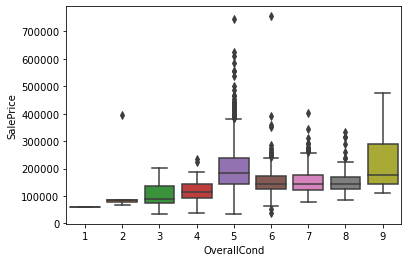

In [11]:
sns.boxplot(x='OverallCond', y="SalePrice", data=train_dum)

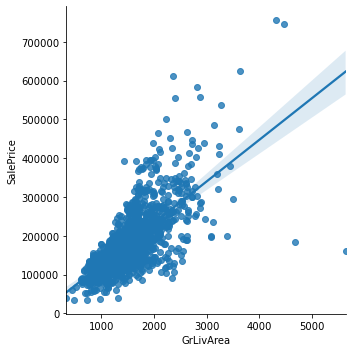

In [12]:
sns.lmplot(x='GrLivArea', y="SalePrice", data=train_dum)

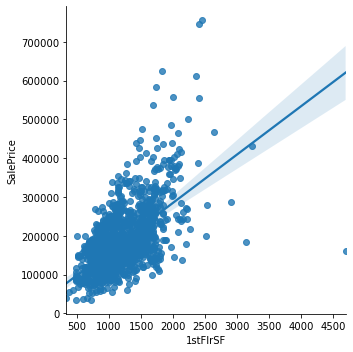

In [13]:
sns.lmplot(x='1stFlrSF', y="SalePrice", data=train_dum)

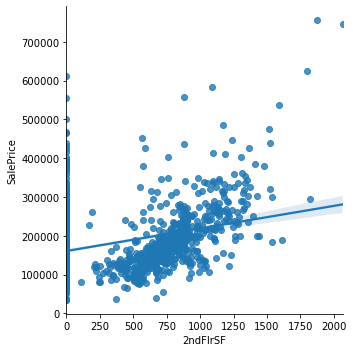

In [14]:
sns.lmplot(x='2ndFlrSF', y="SalePrice", data=train_dum)

In [15]:
#data_dum = pd.get_dummies(data, data.select_dtypes(include="object").columns)
#train_dum = data_dum.loc[data_dum.SalePrice.notna()]
#test_dum = data_dum.loc[data_dum.SalePrice.isna()]
#test_dum = test_dum.drop(columns="SalePrice")

In [16]:
#train_dum = train_dum.fillna(train_dum.mean())
#test_dum = test_dum.fillna(test_dum.mean())

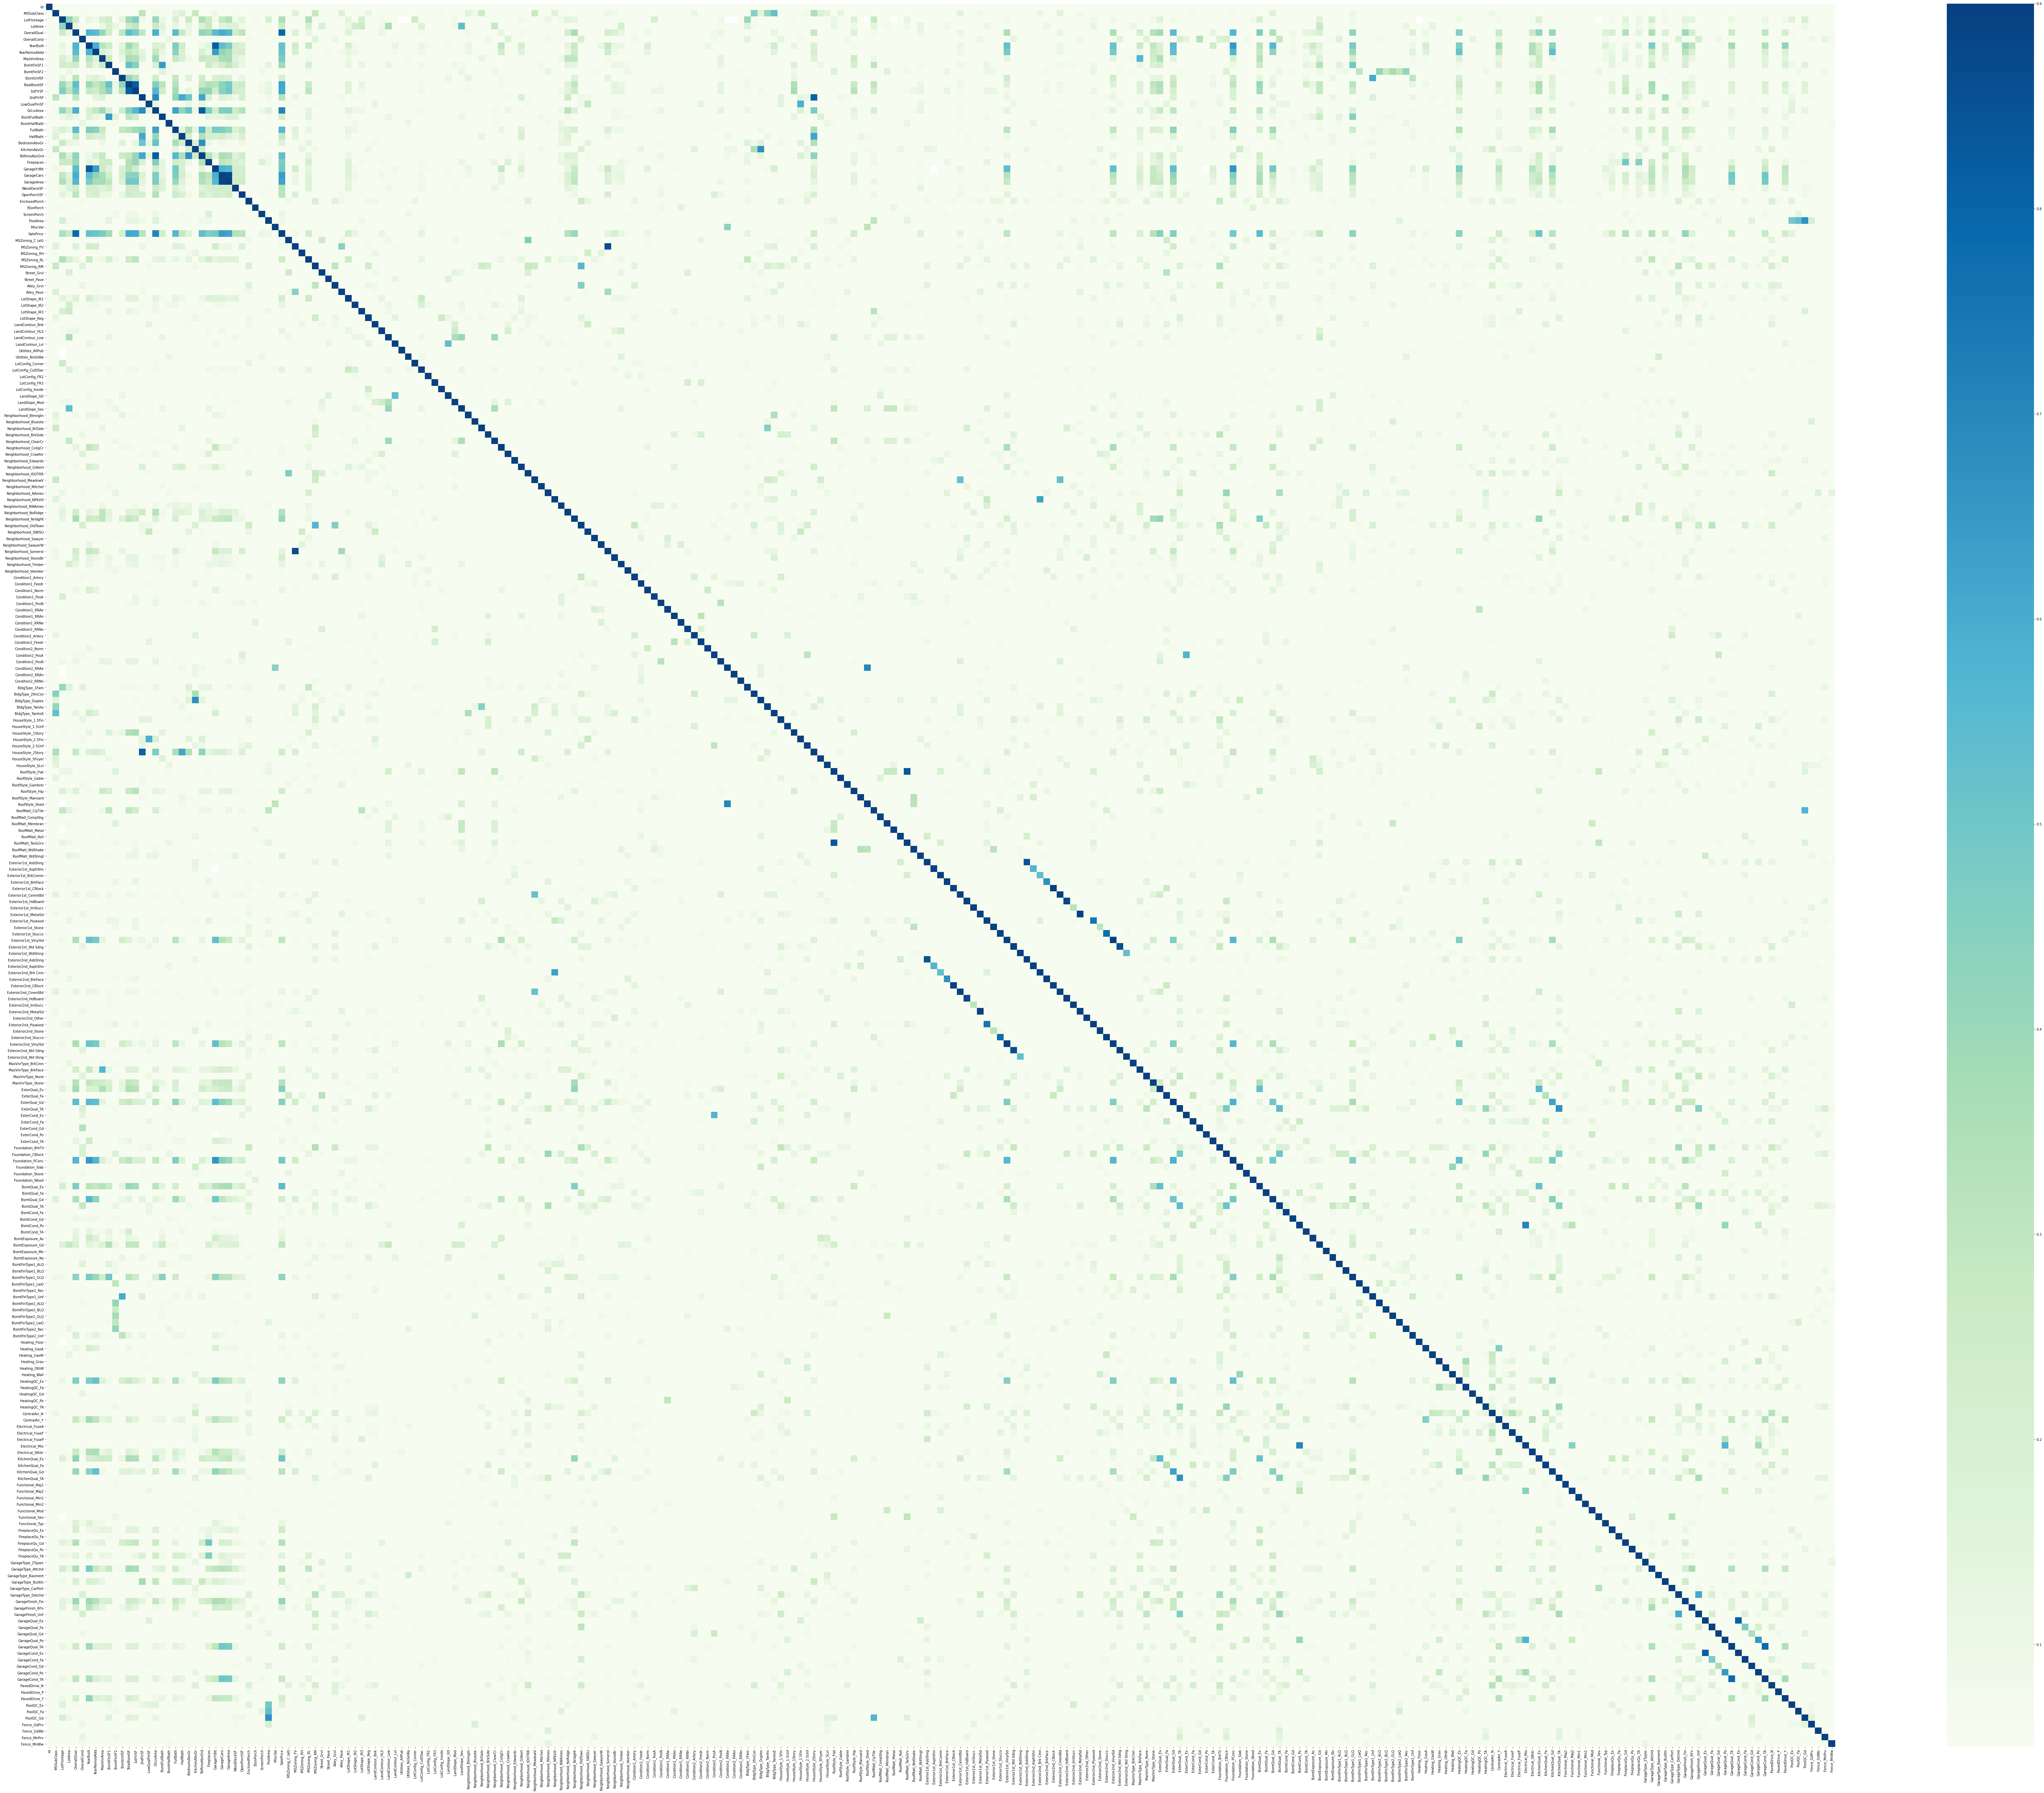

In [17]:
train2 = data_dum.loc[data_dum.SalePrice.notna()]
test2 = data_dum.loc[data_dum.SalePrice.isna()]

corr = train2.corr()
plt.subplots(figsize=(120,96))
sns.heatmap(corr, vmax = 0.9, vmin = 0.05, cmap="GnBu")

In [18]:
data_dum.shape

(2919, 269)

In [19]:
X = train_dum.drop(columns = "SalePrice")
y = train_dum.SalePrice

In [20]:
X_test = test_dum.copy()
""

''

In [21]:
train_dum.shape

(1460, 268)

In [22]:
rf = RandomForestRegressor(n_estimators=200, max_depth=33, random_state=0, n_jobs=-1)
scores = cross_val_score(rf, X, y, cv=10)
print("Random Forest Regressor cross-val score: " + str(sum(scores)/len(scores)))

Random Forest Regressor cross-val score: 0.8670946543391495


In [23]:
rf.fit(X, y)
y_pred_rf = rf.predict(X_test.drop("Id", axis=1))
rf_prediction = pd.DataFrame(test_dum["Id"], columns=["Id"])
rf_prediction["SalePrice"] = y_pred_rf

In [24]:
len(y_pred_rf), len(X_test), rf_prediction

(1459,
 1459,
         Id   SalePrice
 0     1461  126330.705
 1     1462  156229.700
 2     1463  180058.790
 3     1464  183741.360
 4     1465  201279.060
 ...    ...         ...
 1454  2915   84244.520
 1455  2916   86321.000
 1456  2917  153745.170
 1457  2918  113007.210
 1458  2919  222805.405
 
 [1459 rows x 2 columns])

In [25]:
params = {'n_estimators': 250, # 250
          'max_depth': 32,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = GradientBoostingRegressor(**params)
reg.fit(X, y)
y_pred_gb = reg.predict(X_test.drop("Id", axis=1))
gb_prediction = pd.DataFrame(test_dum["Id"], columns=["Id"])
gb_prediction["SalePrice"] = y_pred_gb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

gbr = GradientBoostingRegressor(**params)
scores = cross_val_score(gbr, X, y, cv=10)
print("Gradient Boosting Regressor cross-val score: " + str(sum(scores)/len(scores)))

Gradient Boosting Regressor cross-val score: 0.8180942976616278


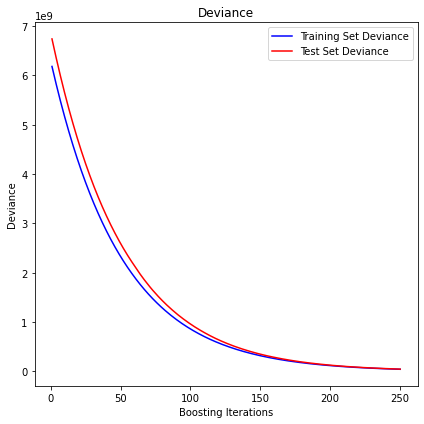

In [26]:
# Taken from scikit learn examples
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

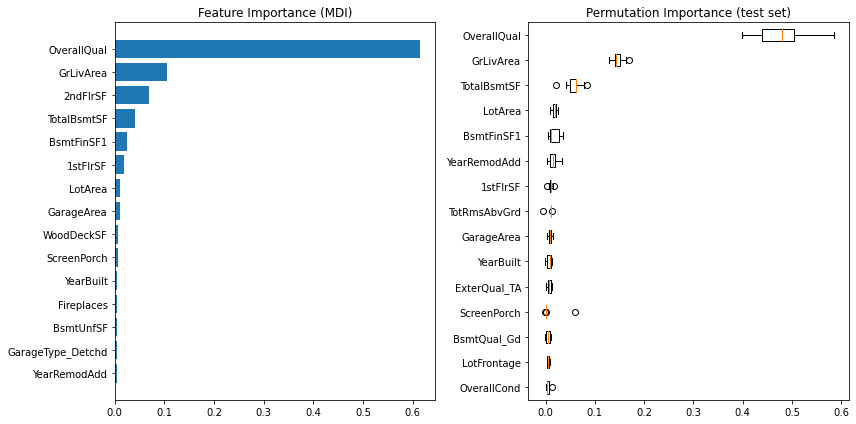

In [27]:
# Taken from scikit learn examples, adapted for our purposes, fixed labelling
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

params = {'n_estimators': 250, # 250
          'max_depth': 32,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

#X = train_dum.drop(columns = "SalePrice")
#y = train_dum.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

feature_importance = reg.feature_importances_
sorteds = list(zip(X_train, feature_importance))
sorteds.sort(key=lambda k:k[1])
colnames, imps = zip(*sorteds)
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pos = np.arange(15) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, imps[-15:], align='center')
plt.yticks(pos, colnames[-15:])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorteds = list(zip(X_train, result.importances))
sorteds.sort(key=lambda k:k[1].mean())
colnames, imps = zip(*sorteds)
sorted_idx = result.importances.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(imps[-15:], vert=False, labels=colnames[-15:])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
#plt.savefig('desd.png', dpi=300)
plt.show()


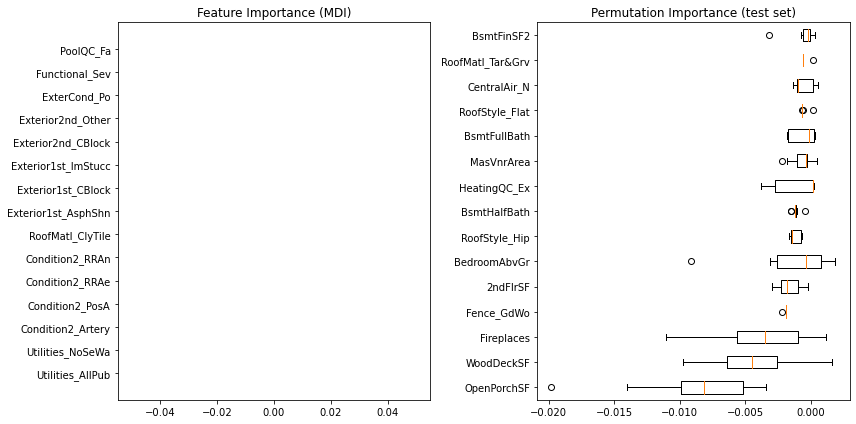

In [28]:
feature_importance = reg.feature_importances_
sorteds = list(zip(X_train, feature_importance))
sorteds.sort(key=lambda k:k[1])
colnames, imps = zip(*sorteds)
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pos = np.arange(15) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, imps[:15], align='center')
plt.yticks(pos, colnames[:15])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorteds = list(zip(X_train, result.importances))
sorteds.sort(key=lambda k:k[1].mean())
colnames, imps = zip(*sorteds)
sorted_idx = result.importances.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(imps[:15], vert=False, labels=colnames[:15])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
#plt.savefig('desd.png', dpi=300)
plt.show()


In [29]:
rf_prediction.to_csv("andmed/random_forest_predictions.csv", index=False)
gb_prediction.to_csv("andmed/gradient_boosting_predictions.csv", index=False)